#              yawbcc ou yawbc2 ou yawb2c pour Yet Another White         Blood Cells Classifier                     Project blood cell computer vision Py

# Contexte


Dans le cadre de notre formation de Data Scientist, nous travaillons à 4 sur un projet d’apprentissage profond pour identifier et classer des celulles sanguines normales et anormales.

Notre sujet concerne les maladies hématologiques (leucémie, infection).

Le nom éventuel de notre projet serait : « Blood cell computer vision Py » ?

Le developememnt de manière exponentielle de la data et des prouesses technologiques en termes d’IA, notamment dans la prévention et les diagnostics de certaines maladies, ont toutes leurs importances.

La densité et l’abondance relative des cellules du sang dans le frottis est cruciale pour le diagnostic de nombreuses pathologies, comme par exemple pour la leucémie qui repose sur le ratio de lymphocytes.

En effet, la présence de leucocytes anormaux suite à une augmentation du nombre de globules blancs, est souvent due à la réponse normale de l'organisme pour combattre une infection ou une maladie (leucémie).

L'identification et la classification des leucocytes, des plaquettes et des érythrocytes est primordiale dans les diagnostic à réaliser.

Sans l’intervention de l’IA, l'identification manuelle des cellules est plus fastidieuse et est sujette à l'erreur humaine. Par ailleurs, les diagnostics sont nettement plus long à réaliser, ce qui augmente le risque de mortalité chez certains patients ayant des maladies à un stade avancé.

Dans le cadre d’un diagnostic complet, le déploiement de l’apprentissage profond est crucial pour effectuer une évaluation visuelle et qualitative des frottis sanguins.
L'analyse automatisée des cellules sanguines facilite des résultats rapides et objectifs et peut également traiter une quantité massive de données sans compromettre l'efficacité.


# Problématique


Les cliniciens s’appuyent sur des analyses assistées par ordinateur pour les frottis sanguins et pour détecter des cellules anormales.

Jusqu’à présent, les analyses de reconnaissance des globules blancs se basaient sur des modèles d'apprentissage automatique peu profonds pour les segmenter, pour séparer des composants, pour extraire des caractéristiques puis pour les classifier.

Cette technique n’est pas des plus fiables puisqu’elle ne ne se généralise pas bien, notamment à cause de la variabilité des systèmes de coloration et d'acquisition de Romanowsky ainsi que des exigences importantes de sa conception en termes de pré-traitement et d'extraction de caractéristiques.





# Objectif


L’objectif du projet « Blood cell computer vision Py » repose sur l'exploitation de données pour réaliser l'analyse approfondie de notre problématique.
Concrètement, l’objectif est d’identifier et classer différents types de cellules sanguines normales en 8 ou 13 classes, grâce au développement d'algorithmes de computer vision. Notre projet permettra de mettre au jour un modèle d’apprentissage par réseau neuronal profond.


# 1ère partie : Analyse de données exploratoire du jeu de données de Barcelone

Cette analyse de données exploratoire repose uniquement sur un seul jeu de données (Barcelone).

Ces données contiennent 17092 images de microscopie d’Individus sains anonymisés (MGG stain), 360 x 363 pixels.
Cet ensemble de données est accessible au public.
Ces 17 092 images représentent des leucocytes sanguins provenant de frottis sanguins de donneurs sains colorés au MGG.1


La 1ère étape de notre projet consiste à réaliser une analyse statistique et exploratoire sur ces 17 092 images pour mieux comprendre leur répartition (analyse des classes les plus représentatives, les moins représentatives, ou encore repérer l’existence d’une ou plusieurs subdivisions de ces classes).

Cette EDA nous permettra de nous imprégner de ces données pour mieux nous éclairer dans les choix à venir en termes :
-de nettoyage des données
-d’enrichissement des données
-d’entrainement et de sélection de modèles de ML
-d’optimisation des parametres sur le modele sélectionné 
-de sérialisation de ce dernier
-d’intégration du modèle ML dans le produit final.


In [61]:
from datasets import load_barcelona_wbc
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

print(pd.__version__)
print(np.__version__)
print(mpl.__version__)
print(sns.__version__)

%matplotlib inline

1.4.2
1.21.5
3.5.1
0.11.2


Ci-dessous, le dataset de Barcelones, nommé df

In [2]:
df = load_barcelona_wbc()
with pd.option_context('display.max_colwidth', None):
    display(df.groupby(['group', 'label']).sample(n=1, random_state=2022).sort_index())
    
# dataframe contenant 6 variables : 4 catégorielles et 2 quantitatives

,image,group,label,width,height,path
597,BA_773081.jpg,BASOPHIL,BA,360,363,/Users/jl/data/barcelona/basophil/BA_773081.jpg
2010,BNE_279578.jpg,NEUTROPHIL,BNE,360,363,/Users/jl/data/barcelona/neutrophil/BNE_279578.jpg
2424,SNE_749679.jpg,NEUTROPHIL,SNE,360,363,/Users/jl/data/barcelona/neutrophil/SNE_749679.jpg
3575,NEUTROPHIL_219512.jpg,NEUTROPHIL,NEUTROPHIL,366,369,/Users/jl/data/barcelona/neutrophil/NEUTROPHIL_219512.jpg
5076,MMY_583780.jpg,IG,MMY,360,363,/Users/jl/data/barcelona/ig/MMY_583780.jpg
5679,MY_505449.jpg,IG,MY,360,363,/Users/jl/data/barcelona/ig/MY_505449.jpg
5705,PMY_383172.jpg,IG,PMY,360,363,/Users/jl/data/barcelona/ig/PMY_383172.jpg
7070,IG_241642.jpg,IG,IG,360,360,/Users/jl/data/barcelona/ig/IG_241642.jpg
8168,MO_756261.jpg,MONOCYTE,MO,360,363,/Users/jl/data/barcelona/monocyte/MO_756261.jpg
10780,EO_923869.jpg,EOSINOPHIL,EO,360,363,/Users/jl/data/barcelona/eosinophil/EO_923869.jpg


In [3]:
# 1ere aperçu du dataframe
for col in df.select_dtypes('object'):
    print(f"[{col}]")
    print(df[col].unique(), end='\n\n')

[image]
['BA_689200.jpg' 'BA_883452.jpg' 'BA_382161.jpg' ... 'PLATELET_750430.jpg'
 'PLATELET_810431.jpg' 'PLATELET_499850.jpg']

[group]
['BASOPHIL' 'NEUTROPHIL' 'IG' 'MONOCYTE' 'EOSINOPHIL' 'ERYTHROBLAST'
 'LYMPHOCYTE' 'PLATELET']

[label]
['BA' 'BNE' 'SNE' 'NEUTROPHIL' 'MY' 'PMY' 'MMY' 'IG' 'MO' 'EO' 'ERB' 'LY'
 'PLATELET']

[path]
['/Users/jl/data/barcelona/basophil/BA_689200.jpg'
 '/Users/jl/data/barcelona/basophil/BA_883452.jpg'
 '/Users/jl/data/barcelona/basophil/BA_382161.jpg' ...
 '/Users/jl/data/barcelona/platelet/PLATELET_750430.jpg'
 '/Users/jl/data/barcelona/platelet/PLATELET_810431.jpg'
 '/Users/jl/data/barcelona/platelet/PLATELET_499850.jpg']



In [4]:
#aucune valeur manquante dans le df
df.isna().sum()

image     0
group     0
label     0
width     0
height    0
path      0
dtype: int64

In [5]:
# Une rapide représentation du nombre d'échantillons par classe et par groupe :
counts = df.groupby(['group', 'label'], as_index=False).size()
counts['pct'] = np.round(counts['size'] / len(df) * 100, 2)
counts

,group,label,size,pct
0,BASOPHIL,BA,1218,7.13
1,EOSINOPHIL,EO,3117,18.24
2,ERYTHROBLAST,ERB,1551,9.07
3,IG,IG,151,0.88
4,IG,MMY,1015,5.94
5,IG,MY,1137,6.65
6,IG,PMY,592,3.46
7,LYMPHOCYTE,LY,1214,7.10
8,MONOCYTE,MO,1420,8.31
9,NEUTROPHIL,BNE,1633,9.55


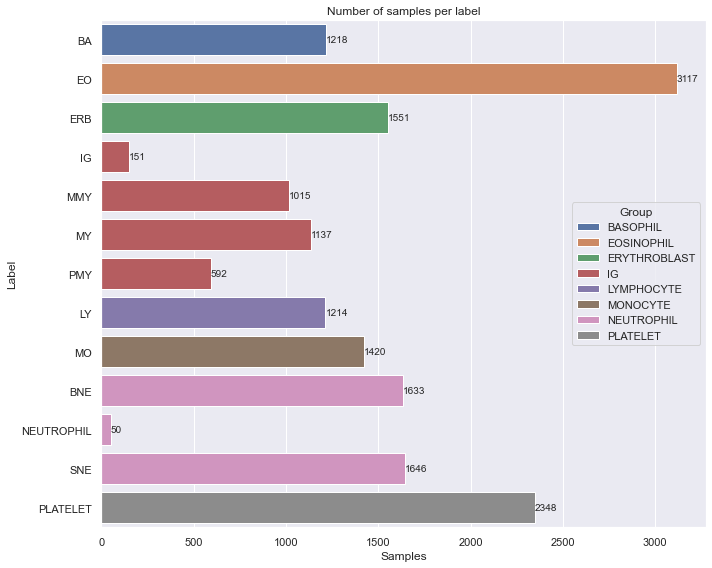

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# histogramme horizontale : Number of samples per label 
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=counts, x='size', y='label', hue='group', ax=ax, dodge=False)
ax.set_title('Number of samples per label')
ax.set_ylabel('Label')
ax.set_xlabel('Samples')
_ = [ax.bar_label(bars) for bars in ax.containers]
ax.legend(loc='center right', title='Group')
fig.tight_layout()

# 8 groupes
Dans le dataset df et dans l’histogramme horizontal, nous constatons que ce jeu de données est constitué de 8 groupes de cellules :
neutrophils,
eosinophils,
basophils,
lymphocytes,
monocytes,
immature granulocytes (promyelocytes, myelocytes, and metamyelocytes),
erythroblasts
and platelets or thrombocytes


# 4 sous groupe
Le groupe  immature granulocytes est subdivisé en 4 sous groupes : MMY, MY, PMY, et BNE


# 13 labels
Dans l’histogramme horizontal, nous remarquons 13 labels au total, dont les 8 labels réalisés par des cliniciens pathologistes :
-neutrophiles - SNE
-éosinophiles - HE
-basophiles - BA
-lymphocytes - LY
-monocytes - MO
-plaquettes - PLAQUETTE
-érythroblastes - ERB
- immature granulocytes (métamyélocytes, myélocytes, promyélocytes) et neutrophiles en bande - IG 

Puis 4 sous labels du groupe IG immature granulocytes : - MMY, - MY, - PMY, et - BNE

Et un label supplémentaire « neutrophil » non classé

# Labels non classés
-NEUTROPHIL & BNE devraient être affectés au groupe IG (Immature Granulocyte)
-Les cliniciens n’on pas réussi à classer les images ayant le label IG

Pour simplifier notre analyse et le developpement de notre produit, nous allons faire abstraction des images provenant des labels NEUTROPHIL & IG, qui ne representent que 0,29 % et 0,88 % des 17 092 images.

In [17]:
# selection d'un echantillon par label : 13 échantillons :
ba_echantillon =["BA_21413.jpg"]
eo_echantillon =["EO_1651.jpg"]
erb_echantillon =["ERB_995294.jpg"]
ly_echantillon =["LY_3945.jpg"]
mo_echantillon =["MO_6446.jpg"]
platelet_echantillon =["PLATELET_997286.jpg"]
sne_echantillon =["SNE_749679.jpg"]
bne_echantillon =["BNE_279578.jpg"]
mmy_echantillon =["MMY_583780.jpg"]
my_echantillon =["MY_505449.jpg"]
pmy_echantillon =["PMY_383172.jpg"]
ig_echantillon =["IG_241642.jpg"]
neutrophil_echantillon =["NEUTROPHIL_219512.jpg"]

# Visualisation de 13 échantillons correspondant aux 13 labels

BA_21413.jpg AxesSubplot(0.125,0.71587;0.168478x0.16413)
EO_1651.jpg AxesSubplot(0.327174,0.71587;0.168478x0.16413)
ERB_995294.jpg AxesSubplot(0.529348,0.71587;0.168478x0.16413)
LY_3945.jpg AxesSubplot(0.731522,0.71587;0.168478x0.16413)
MO_6446.jpg AxesSubplot(0.125,0.518913;0.168478x0.16413)
PLATELET_997286.jpg AxesSubplot(0.327174,0.518913;0.168478x0.16413)
SNE_749679.jpg AxesSubplot(0.529348,0.518913;0.168478x0.16413)
BNE_279578.jpg AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MMY_583780.jpg AxesSubplot(0.125,0.321957;0.168478x0.16413)
MY_505449.jpg AxesSubplot(0.327174,0.321957;0.168478x0.16413)
PMY_383172.jpg AxesSubplot(0.529348,0.321957;0.168478x0.16413)
IG_241642.jpg AxesSubplot(0.731522,0.321957;0.168478x0.16413)


TypeError: Image data of dtype <U13 cannot be converted to float

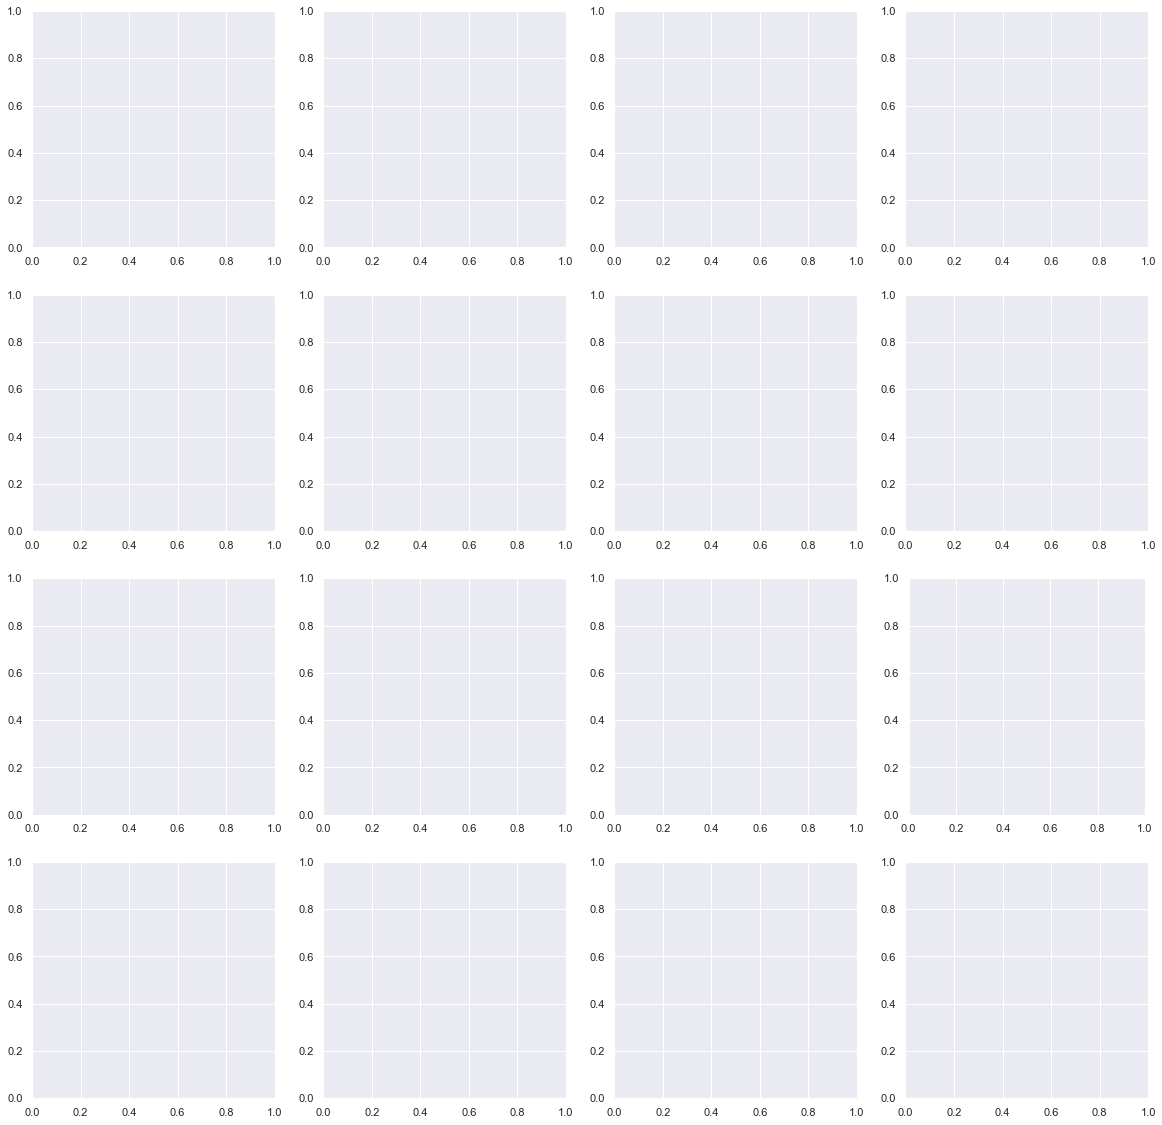

In [62]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
imgs = ["BA_21413.jpg","EO_1651.jpg","ERB_995294.jpg","LY_3945.jpg","MO_6446.jpg","PLATELET_997286.jpg","SNE_749679.jpg","BNE_279578.jpg","MMY_583780.jpg","MY_505449.jpg","PMY_383172.jpg","IG_241642.jpg"]
for ax, imgs in zip(axs.flat, imgs):
    print(imgs, ax)
    
ax.imshow(imgs)

dimensions de l'image bird_small.png :  (369, 366, 3)


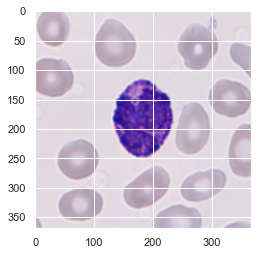

In [64]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon BA
img = plt.imread("BA_21413.jpg")


# Calcul et affichage des dimensions de l'echantillon BA
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon BA
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


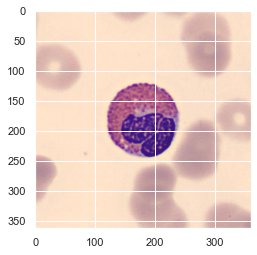

In [42]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon EO
img = plt.imread("EO_1651.jpg")

# Calcul et affichage des dimensions de l'echantillon EO
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon EO
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


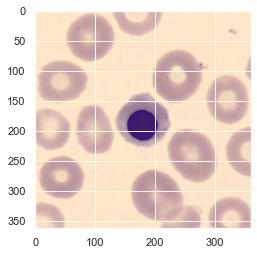

In [43]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon ERB
img = plt.imread("ERB_995294.jpg")

# Calcul et affichage des dimensions de l'echantillon ERB
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon ERB
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


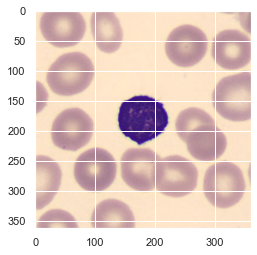

In [44]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon LY
img = plt.imread("LY_3945.jpg")

# Calcul et affichage des dimensions de l'echantillon LY
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon LY
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


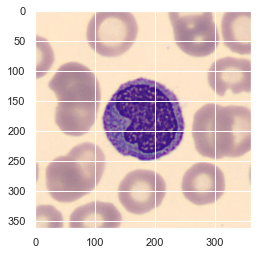

In [45]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon MO
img = plt.imread("MO_6446.jpg")

# Calcul et affichage des dimensions de l'echantillon MO
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon MO
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


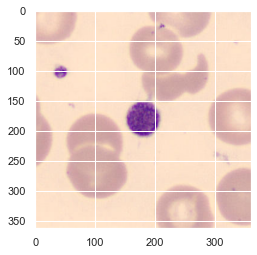

In [46]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon platelet
img = plt.imread("PLATELET_997286.jpg")

# Calcul et affichage des dimensions de l'echantillon platelet
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon platelet
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


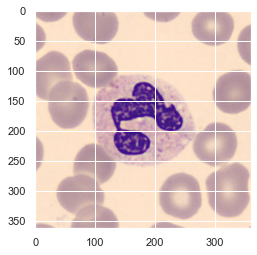

In [47]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon SNE
img = plt.imread("SNE_749679.jpg")

# Calcul et affichage des dimensions de l'echantillon SNE
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon SNE
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


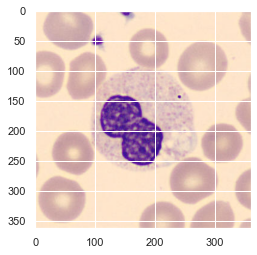

In [48]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon BNE
img = plt.imread("BNE_279578.jpg")

# Calcul et affichage des dimensions de l'echantillon BNE
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon BNE
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


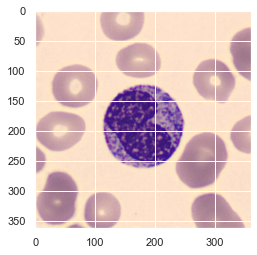

In [49]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon MMY
img = plt.imread("MMY_583780.jpg")

# Calcul et affichage des dimensions de l'echantillon MMY
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon MMY
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


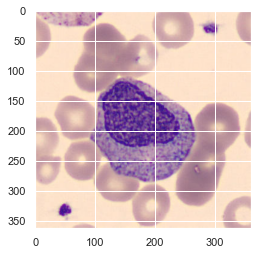

In [50]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon MY
img = plt.imread("MY_505449.jpg")

# Calcul et affichage des dimensions de l'echantillon MY
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon MY
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (363, 360, 3)


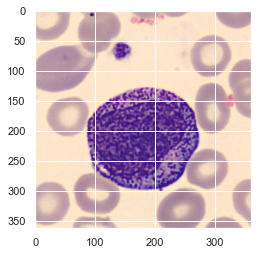

In [51]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon PMY
img = plt.imread("PMY_383172.jpg")

# Calcul et affichage des dimensions de l'echantillon PMY
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon PMY
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (360, 360, 3)


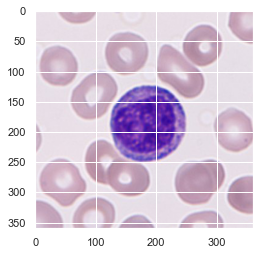

In [52]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon IG
img = plt.imread("IG_241642.jpg")

# Calcul et affichage des dimensions de l'echantillon IG
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon IG
plt.figure()
plt.imshow(img)
plt.show()

dimensions de l'image bird_small.png :  (369, 366, 3)


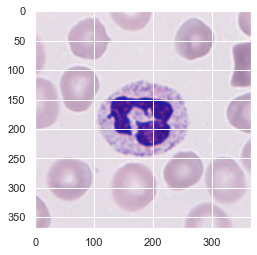

In [53]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'echantillon neutrophil
img = plt.imread("NEUTROPHIL_219512.jpg")

# Calcul et affichage des dimensions de l'echantillon neutrophil
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'echantillon neutrophil
plt.figure()
plt.imshow(img)
plt.show()


# Interprétation des échantillons

Ces echantillons sont un extrait du dataset de barcelones.


Chacune des cellules présente des caractéristiques différentes comme :
- les lobes nucléaires (nombre)
- les granules (couleur)
- le cytoplasme (couleur)
- le noyau (forme)
- sa taille

Notre futur modele d’apprentissage pourra se servir de ces images pour apprendre à reconnaitre des cellules sanguines normales, et pour pouvoir par la suite les différencier des celulles sanguines anormales pour detecter des maladies ou infections.


En conséquence, il faudra normaliser les dimensions de ces echantillons pour les exploiter dans le cadre du developemeent d’un modele d’apprentissage par réseau neuronal profond.